In [34]:


import pytz
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import h5py
import json
from numpy import nan
from datetime import datetime, timedelta, date
from fractions import Fraction
from time import mktime
import time
import requests
import os.path
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [35]:
def save_or_load_from_checkpoint(checkpoint_name):
    if os.path.isfile(checkpoint_name):
        return pd.read_hdf(checkpoint_name,'table')
    df.to_hdf(checkpoint_name, 'table', mode='w', append=True, complevel=9, complib='zlib', index=False)
    return df

In [36]:
df = save_or_load_from_checkpoint('./checkpoints/state_data_full.h5')  

In [37]:
eastern = pytz.timezone('US/Eastern')
df.index = df.index.tz_localize(pytz.utc).tz_convert(eastern)

In [39]:
sns.set(style="whitegrid", palette="pastel", color_codes=True, rc={'figure.figsize':(15,10.6026)})

In [40]:
df['hours'] = [date.hour for date in df.index]

In [42]:
df['weekdays'] = [date.weekday() not in [5,6] for date in df.index]
df['weekdays'] = ["weekday" if i else "weekend" for i in df['weekdays']]

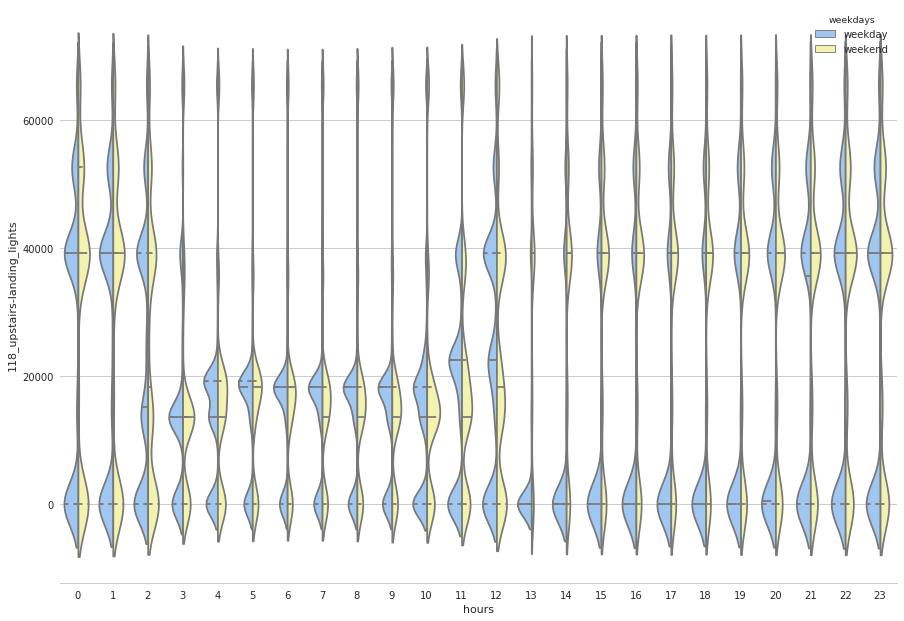

In [44]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="hours", y="118_upstairs-landing_lights", hue="weekdays", data=df, split=True,
               inner="quart", palette={"weekday": "b", "weekend": "y"})
sns.despine(left=True)